In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('data/Social_Network_Ads.csv')
dataset

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [3]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [4]:
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest=train_test_split(X,y,test_size=0.25,random_state=42)

In [5]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini',min_samples_split=30,random_state=42)
# min_samples_split이 너무 작거나
# max_depth가 너무 크면 overfitting 발생할 수 있음

In [6]:
# scaling 필요없음
dt.fit(xTrain,yTrain)

DecisionTreeClassifier(min_samples_split=30, random_state=42)

In [7]:
dt.predict([[42,60000]])

array([0])

In [8]:
yPred=dt.predict(xTest)
print(yPred)

[1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0
 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1]


In [9]:
# accuracy, confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix
cm=confusion_matrix(yTest,yPred)
accTest=accuracy_score(yTest,yPred)
accTrain=accuracy_score(yTrain,dt.predict(xTrain))

print('*confusion matrix: \n',cm)
print('*training accuracy: ',round(accTrain,4)*100)
print('*test accuracy: ',round(accTest,4)*100)

*confusion matrix: 
 [[57  6]
 [ 1 36]]
*training accuracy:  91.67
*test accuracy:  93.0


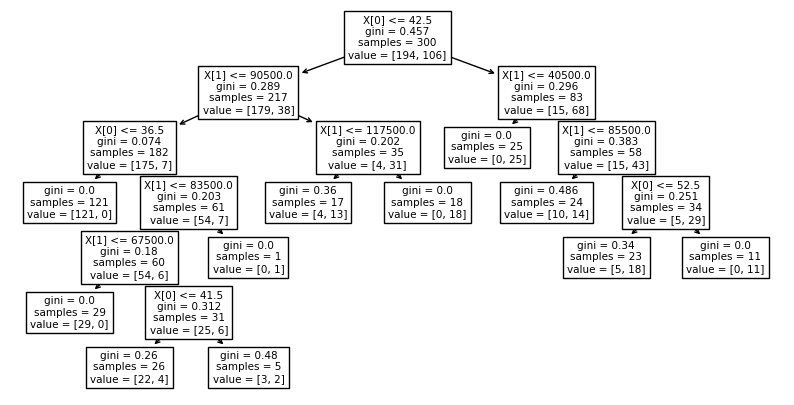

In [10]:
# 결과(tree) 시각화
from sklearn.tree import plot_tree
plt.figure(figsize=(10,5))
plot_tree(dt)
plt.show()

In [11]:
# dt attribute
print('node의 수: ',dt.tree_.node_count)
print('좌측 node index: ',dt.tree_.children_left)
print('우측 node index: ',dt.tree_.children_right)
print('node 특징(X) index: ',dt.tree_.feature)
print('node의 threshold: ',dt.tree_.threshold)
print('node의 값: ',dt.tree_.value)

node의 수:  21
좌측 node index:  [ 1  2  3 -1  5  6 -1  8 -1 -1 -1 12 -1 -1 15 -1 17 -1 19 -1 -1]
우측 node index:  [14 11  4 -1 10  7 -1  9 -1 -1 -1 13 -1 -1 16 -1 18 -1 20 -1 -1]
node 특징(X) index:  [ 0  1  0 -2  1  1 -2  0 -2 -2 -2  1 -2 -2  1 -2  1 -2  0 -2 -2]
node의 threshold:  [ 4.250e+01  9.050e+04  3.650e+01 -2.000e+00  8.350e+04  6.750e+04
 -2.000e+00  4.150e+01 -2.000e+00 -2.000e+00 -2.000e+00  1.175e+05
 -2.000e+00 -2.000e+00  4.050e+04 -2.000e+00  8.550e+04 -2.000e+00
  5.250e+01 -2.000e+00 -2.000e+00]
node의 값:  [[[194. 106.]]

 [[179.  38.]]

 [[175.   7.]]

 [[121.   0.]]

 [[ 54.   7.]]

 [[ 54.   6.]]

 [[ 29.   0.]]

 [[ 25.   6.]]

 [[ 22.   4.]]

 [[  3.   2.]]

 [[  0.   1.]]

 [[  4.  31.]]

 [[  4.  13.]]

 [[  0.  18.]]

 [[ 15.  68.]]

 [[  0.  25.]]

 [[ 15.  43.]]

 [[ 10.  14.]]

 [[  5.  29.]]

 [[  5.  18.]]

 [[  0.  11.]]]


In [12]:
from sklearn.tree import export_text
dtText=export_text(dt,feature_names=['age','salary'])
print(dtText)

|--- age <= 42.50
|   |--- salary <= 90500.00
|   |   |--- age <= 36.50
|   |   |   |--- class: 0
|   |   |--- age >  36.50
|   |   |   |--- salary <= 83500.00
|   |   |   |   |--- salary <= 67500.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- salary >  67500.00
|   |   |   |   |   |--- age <= 41.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- age >  41.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- salary >  83500.00
|   |   |   |   |--- class: 1
|   |--- salary >  90500.00
|   |   |--- salary <= 117500.00
|   |   |   |--- class: 1
|   |   |--- salary >  117500.00
|   |   |   |--- class: 1
|--- age >  42.50
|   |--- salary <= 40500.00
|   |   |--- class: 1
|   |--- salary >  40500.00
|   |   |--- salary <= 85500.00
|   |   |   |--- class: 1
|   |   |--- salary >  85500.00
|   |   |   |--- age <= 52.50
|   |   |   |   |--- class: 1
|   |   |   |--- age >  52.50
|   |   |   |   |--- class: 1



(250000, 2)


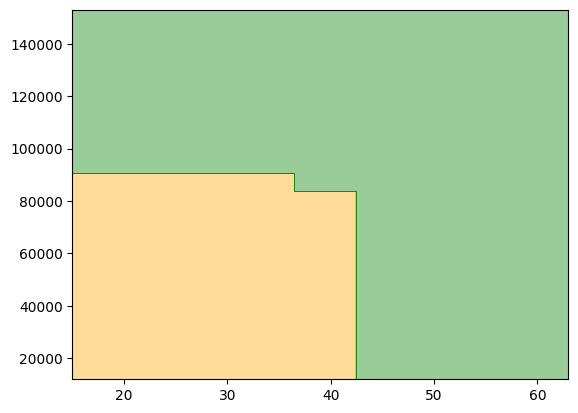

In [13]:
x1min=xTrain[:,0].min()-3
x1max=xTrain[:,0].max()+3
x1=np.linspace(x1min,x1max,500)
x2min=xTrain[:,1].min()-3000
x2max=xTrain[:,1].max()+3000
x2=np.linspace(x2min,x2max,500)

# meshgrid
X1,X2=np.meshgrid(x1,x2)
# 2D인 X1과 X2를 1D로 변환후, xTrain(또는 xTest) 형태로 결합
X1tmp=X1.reshape(-1,1)
X2tmp=X2.reshape(-1,1)
X1X2=np.concatenate((X1tmp,X2tmp),axis=1)
print(X1X2.shape)
# xTrain 및 xTest와 동일한 2D형태 (열의 수는 feature의 수(age,salary))

# X1X2에 대한 prediction
X1X2pred=dt.predict(X1X2)
# X1X2pred는 X1X2에 대한 결과이므로, (250000,)
# meshgrid에 적용하기 위해 (500,500)으로 변경
X1X2mesh=X1X2pred.reshape(500,500)

from matplotlib.colors import ListedColormap
classColor=ListedColormap(('orange','green'))
plt.contourf(X1,X2,X1X2mesh,cmap=classColor,alpha=0.4)

# yTest가 0인 X는 빨간색, 1인 X는 파란색으로 scatter plot할 것